In [1]:
!python --version

Python 3.14.0


In [ ]:
!pip list

In [9]:
!conda --version

conda 25.9.1


In [10]:
!conda env list


# conda environments:
#
# *  -> active
# + -> frozen
base                     C:\Files\Softwares\miniconda3
midterm_proj         *   C:\Files\Softwares\miniconda3\envs\midterm_proj



In [1]:
# All imports here

import pandas as pd
import numpy as np

In [2]:
# All constants here
DATA_LOCATION = '..\\Data\\'
FILE_NAME = 'InputFile'
FILE_TYPE ='.csv'
INTERMEDIARY_FILE = 'checking.csv'

# All variables here
df = []

In [3]:
def reload_df():
    global df
    df = pd.read_csv(DATA_LOCATION + FILE_NAME + FILE_TYPE)
reload_df()
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [4]:
# confirmation of Unix time accuracy

df['val_date'] = pd.to_datetime(df['UNIXTime'], unit='s')

In [5]:
df.columns = df.columns.str.lower()

# brackets present so...

df.rename(columns={'winddirection(degrees)': 'winddirection'}, inplace=True)
df

,unixtime,data,time,radiation,temperature,pressure,humidity,winddirection,speed,timesunrise,timesunset,val_date
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,2016-12-01 10:20:04
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,2016-12-01 10:15:01
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,2016-12-01 10:10:01
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,2016-12-01 10:05:02


## Next step
1. To calculate total sunlight time from sunset, sunrise difference
2. The time data was measured has impact but by how much
3. To plot and get the correlation between each feature
4. How much impact each feature has on target feature
...
N. Which regressor to use

In [6]:
# order by unix time

df.sort_values(by='unixtime', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,unixtime,data,time,radiation,temperature,pressure,humidity,winddirection,speed,timesunrise,timesunset,val_date
0,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,2016-09-01 10:00:08
1,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,2016-09-01 10:05:10
2,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,2016-09-01 10:20:06
3,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,2016-09-01 10:25:05
4,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,2016-09-01 10:30:09
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1483263302,12/31/2016 12:00:00 AM,23:35:02,1.22,41,30.34,83,238.94,6.75,06:57:00,17:54:00,2017-01-01 09:35:02
32682,1483263601,12/31/2016 12:00:00 AM,23:40:01,1.21,41,30.34,82,236.79,5.62,06:57:00,17:54:00,2017-01-01 09:40:01
32683,1483263904,12/31/2016 12:00:00 AM,23:45:04,1.21,42,30.34,81,218.28,7.87,06:57:00,17:54:00,2017-01-01 09:45:04
32684,1483264203,12/31/2016 12:00:00 AM,23:50:03,1.19,41,30.34,80,215.23,7.87,06:57:00,17:54:00,2017-01-01 09:50:03


In [7]:
# 1. Convert the UNIXTime column to a proper Pandas datetime object (in seconds)
# df['RecordedDateTime'] = pd.to_datetime(df['unixtime'], unit='s')

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# 2. Extract the individual components using the .dt accessor
df['recorded_year'] = df['data'].dt.year
df['recorded_month'] = df['data'].dt.month
df['recorded_day'] = df['data'].dt.day
df['recorded_hour'] = df['time'].dt.hour
df['recorded_minute'] = df['time'].dt.minute
df['recorded_second'] = df['time'].dt.second

# Optional: Drop the intermediate datetime column if you don't need it
df.drop(columns = ['unixtime','data','time'],inplace=True)
df

C:\Users\User 1\AppData\Local\Temp\ipykernel_15512\269950647.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')
C:\Users\User 1\AppData\Local\Temp\ipykernel_15512\269950647.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['data'] = pd.to_datetime(df['data'], errors='coerce')


,radiation,temperature,pressure,humidity,winddirection,speed,timesunrise,timesunset,val_date,recorded_year,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second
0,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,2016-09-01 10:00:08,2016,9,1,0,0,8
1,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,2016-09-01 10:05:10,2016,9,1,0,5,10
2,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,2016-09-01 10:20:06,2016,9,1,0,20,6
3,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,2016-09-01 10:25:05,2016,9,1,0,25,5
4,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,2016-09-01 10:30:09,2016,9,1,0,30,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,06:57:00,17:54:00,2017-01-01 09:35:02,2016,12,31,23,35,2
32682,1.21,41,30.34,82,236.79,5.62,06:57:00,17:54:00,2017-01-01 09:40:01,2016,12,31,23,40,1
32683,1.21,42,30.34,81,218.28,7.87,06:57:00,17:54:00,2017-01-01 09:45:04,2016,12,31,23,45,4
32684,1.19,41,30.34,80,215.23,7.87,06:57:00,17:54:00,2017-01-01 09:50:03,2016,12,31,23,50,3


In [8]:
#since unix time dont match the said data, unix time wont be taken into consideration
df['Sunrise_TD'] = pd.to_timedelta(df['timesunrise'])
df['Sunset_TD'] = pd.to_timedelta(df['timesunset'])

# 2. Calculate the difference to get the total duration of daylight
df['Daylight_Duration_TD'] = df['Sunset_TD'] - df['Sunrise_TD']

# 3. Convert the duration to a numerical feature (Total Hours)
# This is the ideal format for machine learning models.
df['daylight_hours'] = df['Daylight_Duration_TD'].dt.total_seconds() / 3600

df['timesunrise'] = pd.to_datetime(df['timesunrise'], errors='coerce')
df['timesunset'] = pd.to_datetime(df['timesunset'], errors='coerce')

# 2. Extract the individual components using the .dt accessor
df['sunrise_hour'] = df['timesunrise'].dt.hour
df['sunrise_minutes'] = df['timesunrise'].dt.minute
df['sunrise_seconds'] = df['timesunrise'].dt.second
df['sunset_hour'] = df['timesunset'].dt.hour
df['sunset_minutes'] = df['timesunset'].dt.minute
df['sunset_seconds'] = df['timesunset'].dt.second

# Optional: Drop the intermediate datetime column if you don't need it
df.drop(columns = ['timesunrise','timesunset','val_date','Sunrise_TD','Sunset_TD','Daylight_Duration_TD'],inplace=True)

df

C:\Users\User 1\AppData\Local\Temp\ipykernel_15512\1693915919.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timesunrise'] = pd.to_datetime(df['timesunrise'], errors='coerce')
C:\Users\User 1\AppData\Local\Temp\ipykernel_15512\1693915919.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timesunset'] = pd.to_datetime(df['timesunset'], errors='coerce')


,radiation,temperature,pressure,humidity,winddirection,speed,recorded_year,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second,daylight_hours,sunrise_hour,sunrise_minutes,sunrise_seconds,sunset_hour,sunset_minutes,sunset_seconds
0,2.58,51,30.43,103,77.27,11.25,2016,9,1,0,0,8,12.516667,6,7,0,18,38,0
1,2.83,51,30.43,103,153.44,9.00,2016,9,1,0,5,10,12.516667,6,7,0,18,38,0
2,2.16,51,30.43,103,142.04,7.87,2016,9,1,0,20,6,12.516667,6,7,0,18,38,0
3,2.21,51,30.43,103,144.12,18.00,2016,9,1,0,25,5,12.516667,6,7,0,18,38,0
4,2.25,51,30.43,103,67.42,11.25,2016,9,1,0,30,9,12.516667,6,7,0,18,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,2016,12,31,23,35,2,10.950000,6,57,0,17,54,0
32682,1.21,41,30.34,82,236.79,5.62,2016,12,31,23,40,1,10.950000,6,57,0,17,54,0
32683,1.21,42,30.34,81,218.28,7.87,2016,12,31,23,45,4,10.950000,6,57,0,17,54,0
32684,1.19,41,30.34,80,215.23,7.87,2016,12,31,23,50,3,10.950000,6,57,0,17,54,0


In [20]:
df.describe()

,radiation,temperature,pressure,humidity,winddirection,speed,recorded_year,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second,daylight_hours,sunrise_hour,sunrise_minutes,sunrise_seconds,sunset_hour,sunset_minutes,sunset_seconds
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.0,32686.000000,32686.000000,32686.0
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,2016.0,10.526066,15.825766,11.557425,27.556691,17.441902,11.509176,6.0,27.640519,0.0,17.347886,37.317904,0.0
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.0,1.096691,8.711824,6.912034,17.268507,12.951109,0.498854,0.0,15.518714,0.0,0.476307,15.938416,0.0
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,2016.0,9.000000,1.000000,0.000000,0.000000,0.000000,10.933333,6.0,7.000000,0.0,17.000000,0.000000,0.0
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,2016.0,10.000000,9.000000,6.000000,15.000000,5.000000,11.033333,6.0,14.000000,0.0,17.000000,26.000000,0.0
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,2016.0,11.000000,16.000000,12.000000,30.000000,18.000000,11.400000,6.0,24.000000,0.0,17.000000,43.000000,0.0
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,2016.0,11.000000,23.000000,18.000000,45.000000,22.000000,11.916667,6.0,40.000000,0.0,18.000000,48.000000,0.0
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,2016.0,12.000000,31.000000,23.000000,57.000000,59.000000,12.516667,6.0,57.000000,0.0,18.000000,59.000000,0.0


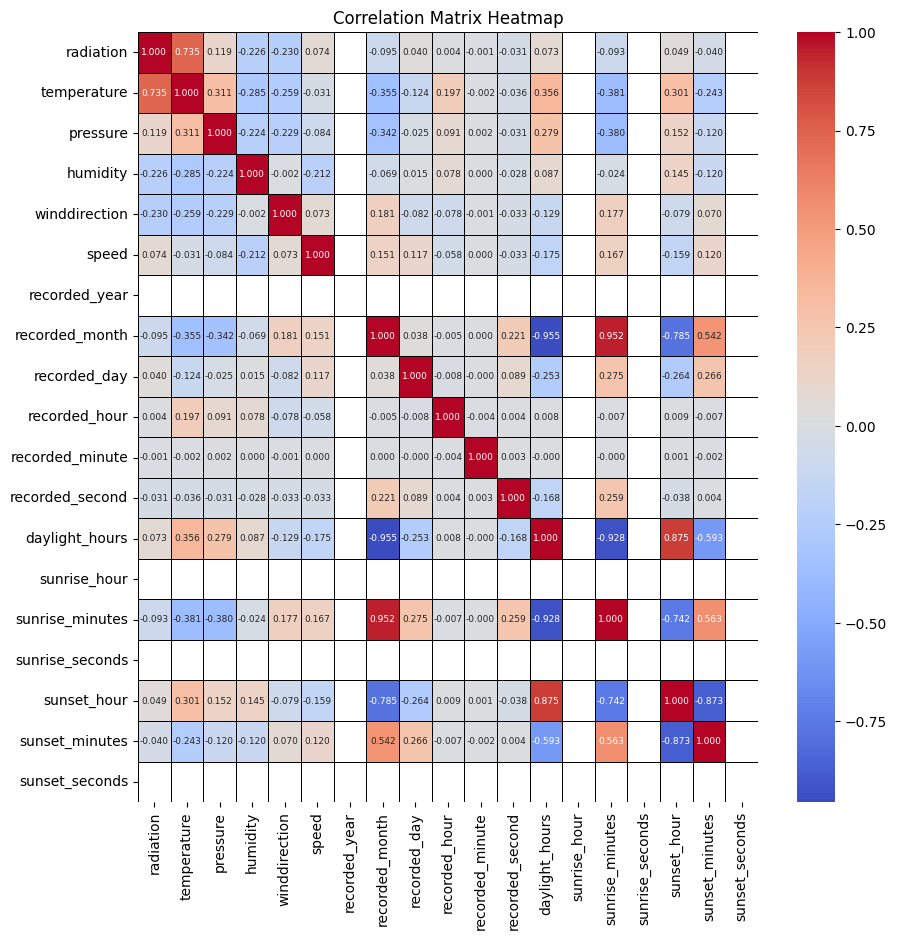

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the Correlation Matrix
def heatmap():
    correlation_matrix = df.corr()

    # 2. Set up the Matplotlib figure
    plt.figure(figsize=(10, 10)) # Adjust size for readability

    # 3. Create the Heatmap using Seaborn
    sns.heatmap(
        correlation_matrix,
        annot=True,       # Show the correlation values on the heatmap
        fmt=".3f",        # Format the numbers to 2 decimal places
        cmap="coolwarm",  # Color map (cool to warm, for blue=negative, red=positive)
        cbar=True,        # Show the color bar
        linewidths=.5,    # Lines between cells
        linecolor='black', # Color of the lines
        annot_kws={"fontsize": 6.5}
    )

    # 4. Add a title and display the plot
    plt.title('Correlation Matrix Heatmap')
    plt.show() # In a notebook environment, use plt.show()
    # If saving the file: plt.savefig('correlation_heatmap.png')

heatmap()

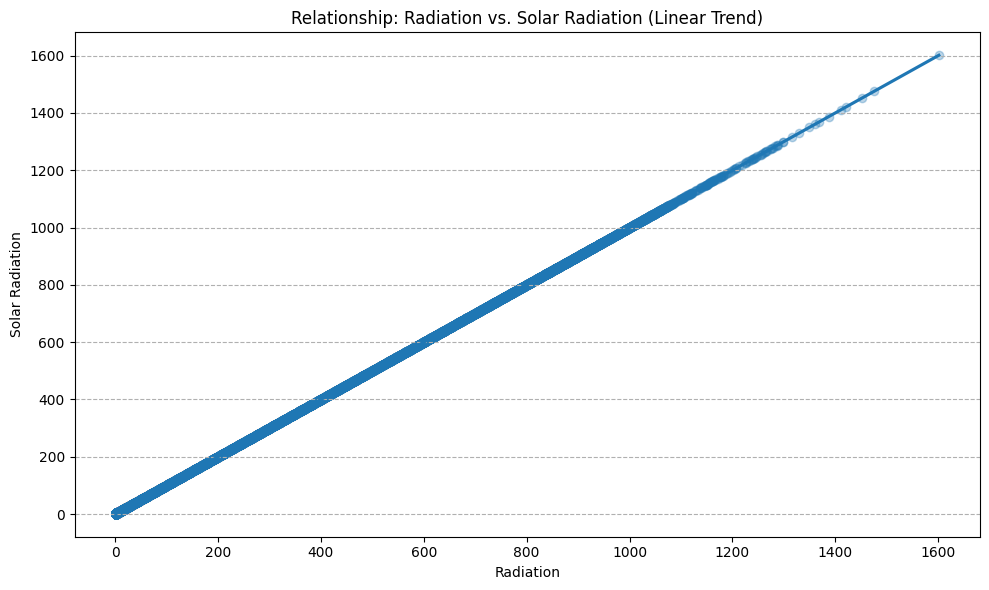

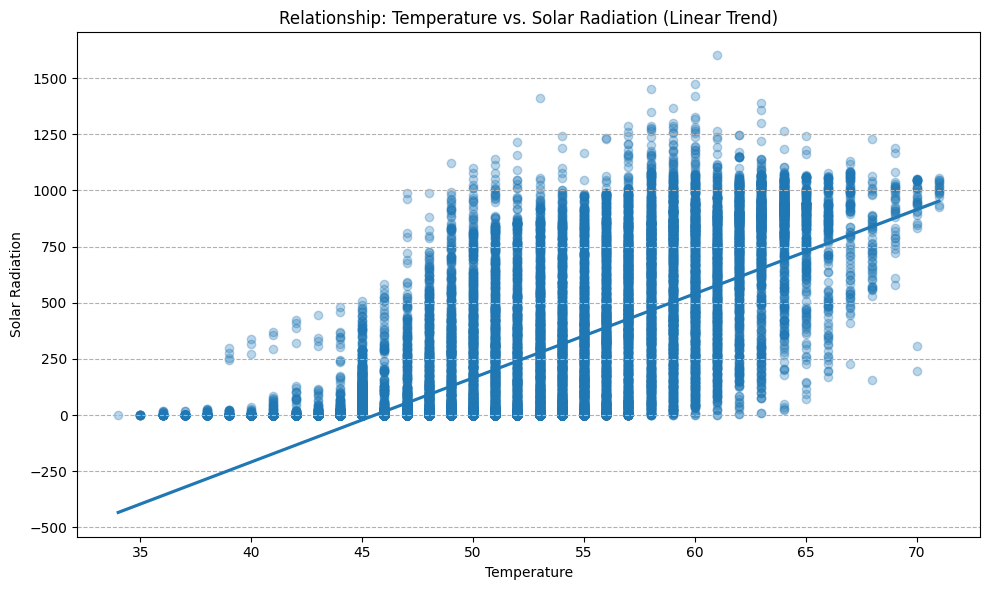

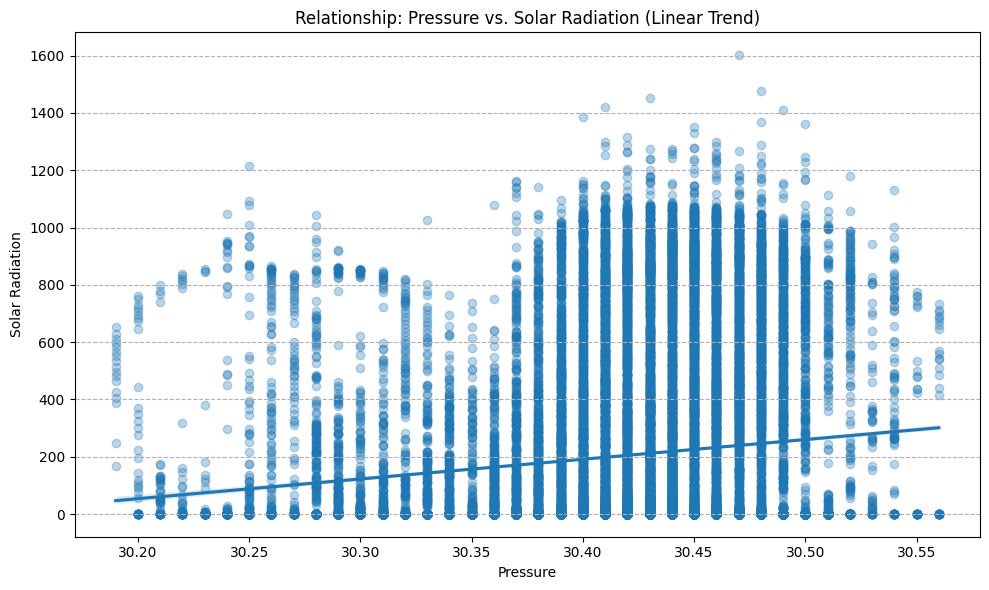

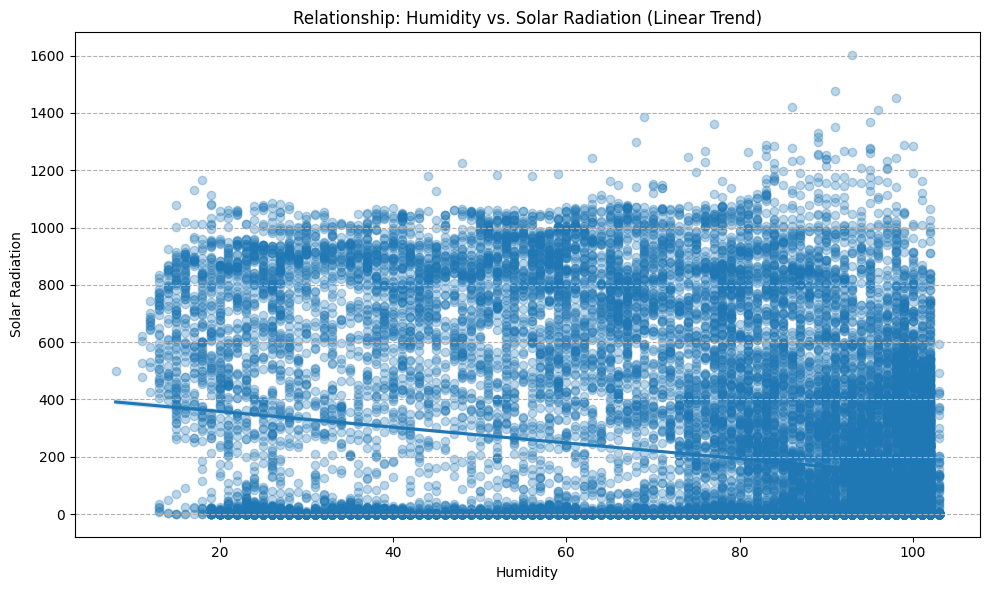

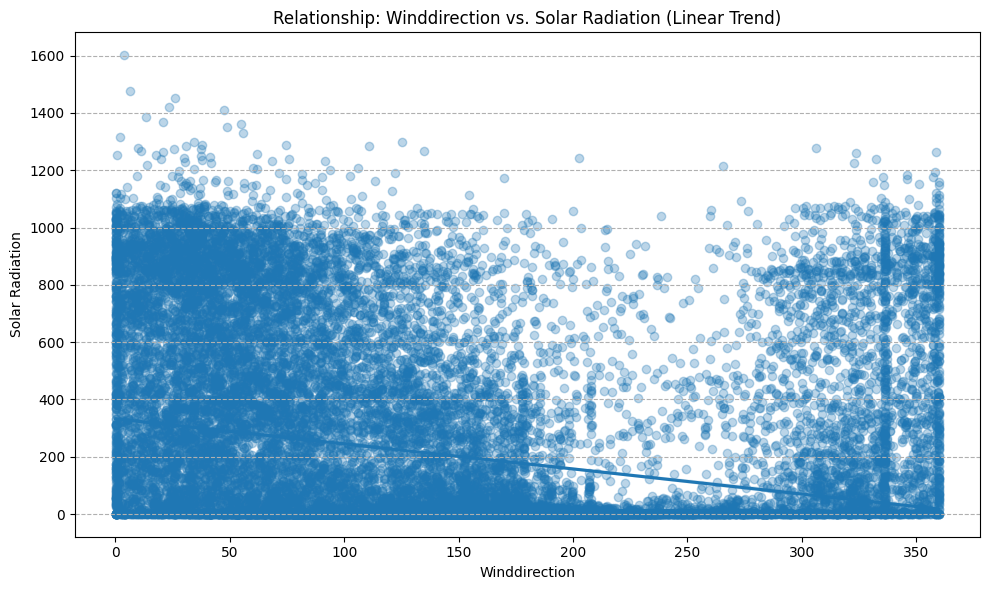

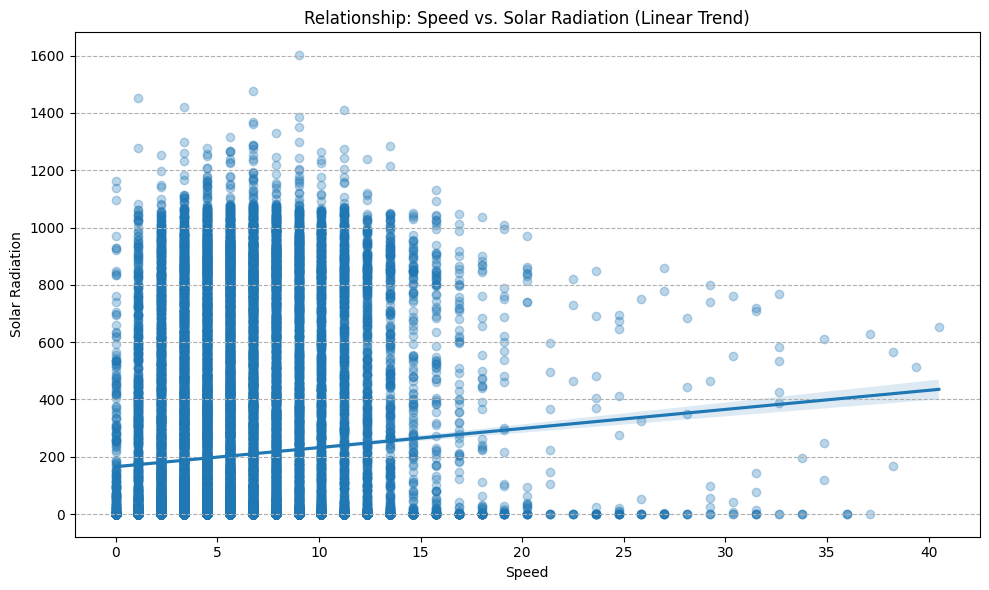

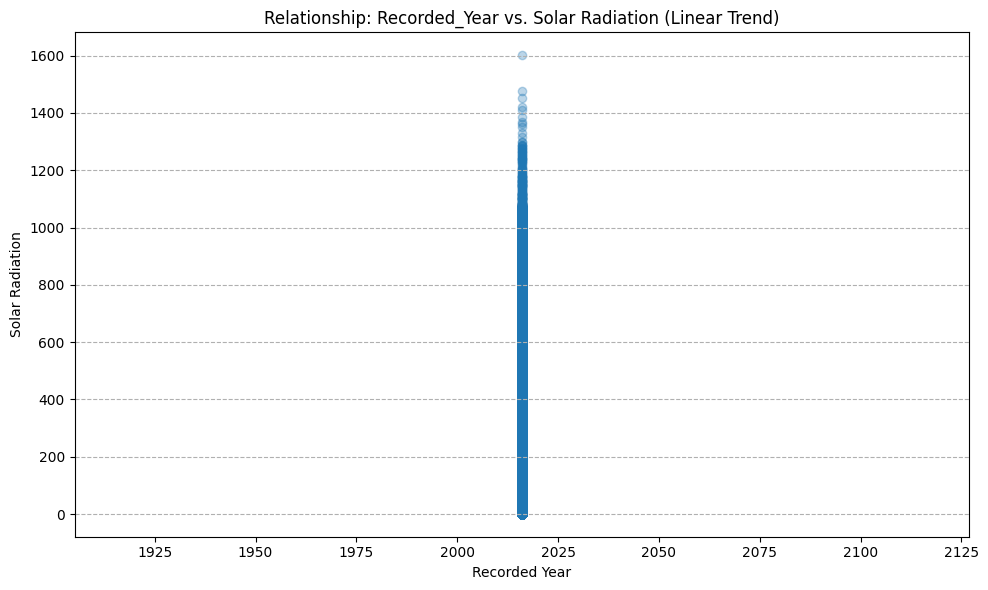

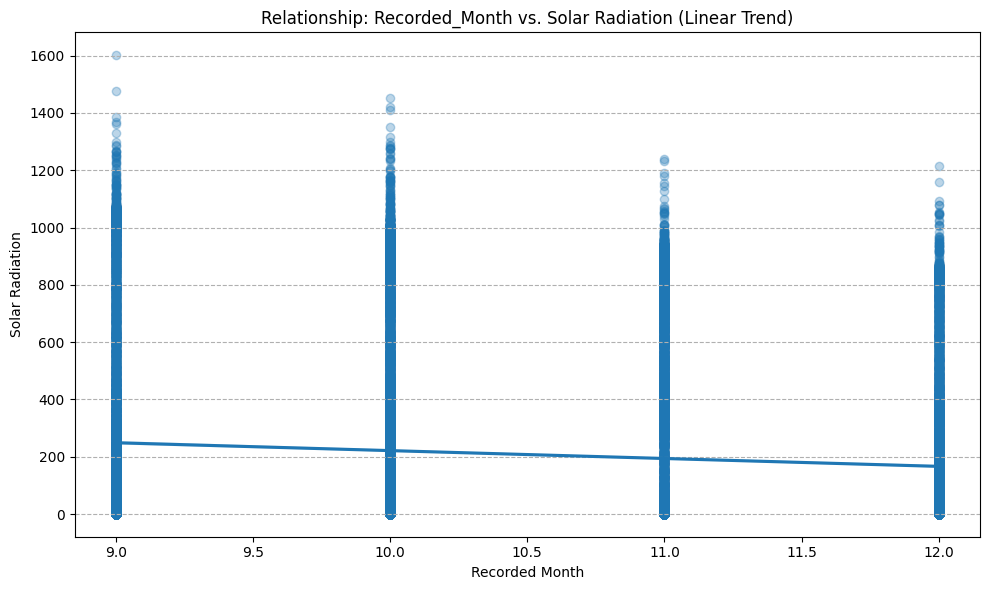

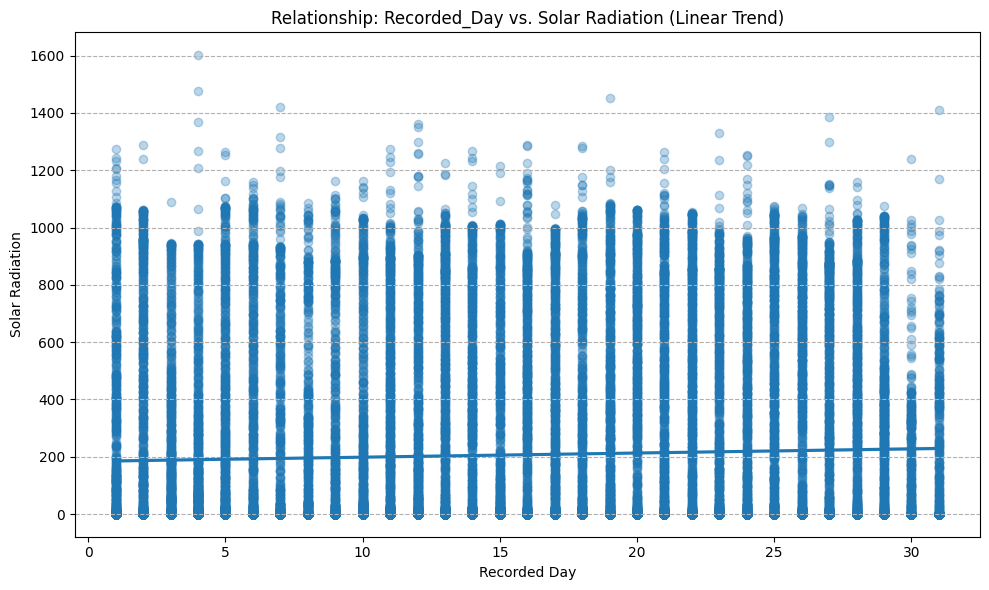

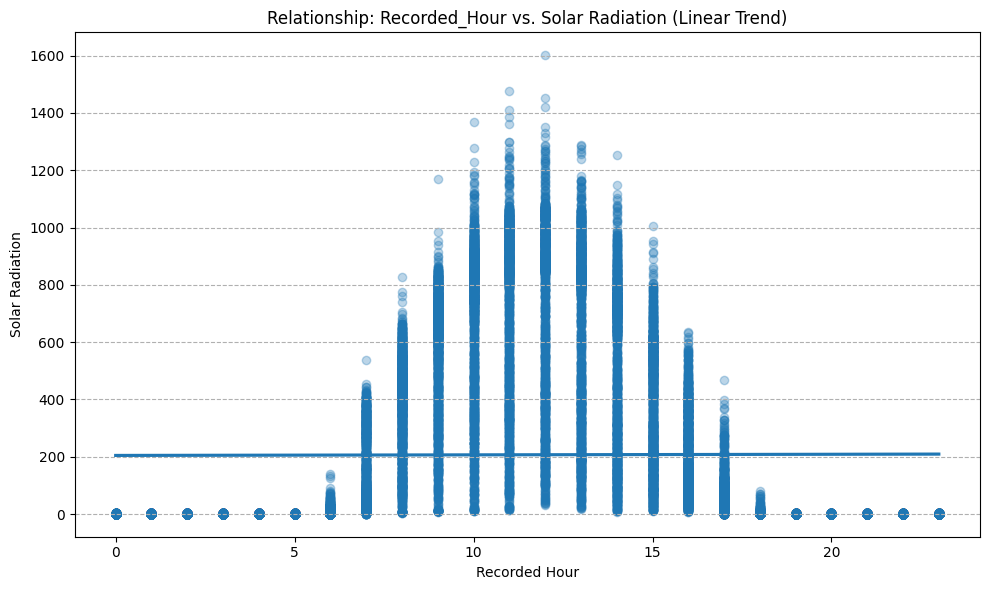

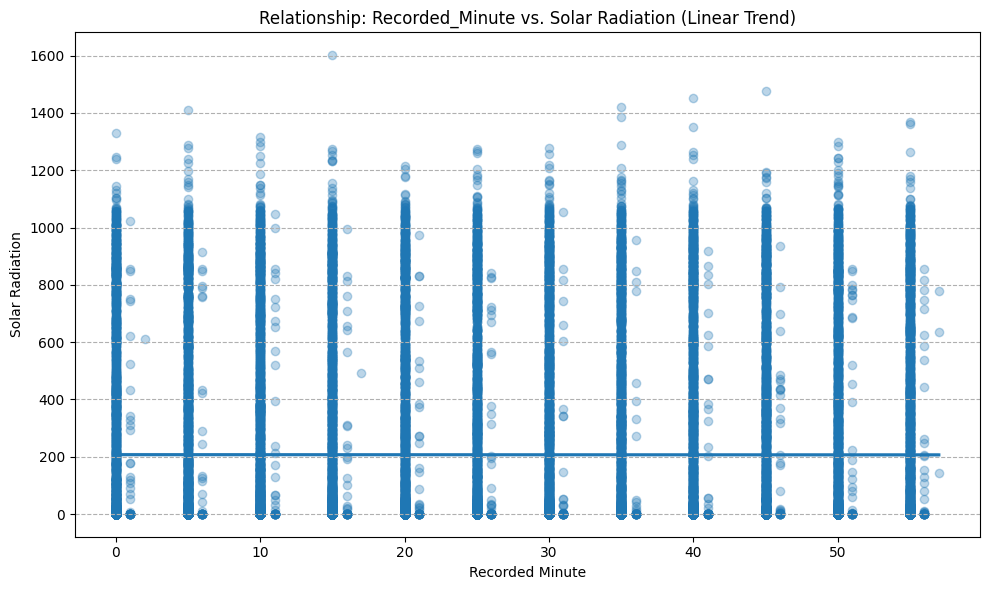

In [ ]:
TARGET_COL = 'radiation'

# Columns to skip (IDs, duplicates, or non-numeric metadata)
# SKIP_COLUMNS = [TARGET_COL, 'unixtime', 'data', 'time', 'timesunrise', 'timesunset', 'col1_dt', 'col2_dt', 'recordeddatetime']

# Get the list of features to plot (clean features only)
features_to_plot = [col for col in df.columns]


# --- Plotting Loop ---

# Set a threshold to distinguish between continuous and discrete features
# (If a column has fewer than 20 unique values, treat it as discrete)
UNIQUE_VALUE_THRESHOLD = 20

for feature in features_to_plot:
    
    # 1. Determine Plot Type
    is_discrete = df[feature].nunique() < UNIQUE_VALUE_THRESHOLD
    
    plt.figure(figsize=(10, 6))

    '''
    if is_discrete:
        # Use Box Plot for discrete/categorical features (e.g., month, hour)
        sns.boxplot(x=feature, y=TARGET_COL, data=df)
        plt.title(f'Impact of {feature.title()} on Solar Radiation (Distribution)')
        
        # Adjust x-ticks for readability if there are many unique categories
        if df[feature].nunique() > 10:
             plt.xticks(rotation=45, ha='right')
    '''
    
    #else:
        # Use Regression Plot for continuous features (e.g., speed, temperature)
        # The 'reg' line shows the linear trend.
    sns.regplot(x=feature, y=TARGET_COL, data=df, scatter_kws={'alpha':0.3})
    plt.title(f'Relationship: {feature.title()} vs. Solar Radiation (Linear Trend)')

    # 2. Final Touches
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Solar Radiation')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

In [ ]:
df.nunique()

In [9]:
# Full daylight time taken so sunrise and sunset time not needed
cols_to_drop = ['sunrise_minutes','sunset_hour','sunset_minutes']

# Iterate through all columns in the DataFrame
for col in df.columns:
    # nunique(dropna=False) counts unique values, including NaN/NaT if present.
    # We want to check if the non-missing values are all the same.
    # If dropna=True (default), it counts unique non-missing values.
    # Let's use dropna=True to capture the common case where a column is constant.
    if df[col].nunique(dropna=True) == 1:
        cols_to_drop.append(col)
        print(f"Identified column to drop: '{col}' (Unique Value: {df[col].iloc[0]})")
    
# Check if any columns were found and drop them
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"\nSuccessfully dropped the following {len(cols_to_drop)} columns: {cols_to_drop}")
else:
    print("\nNo columns found with only one unique non-missing value. DataFrame remains unchanged.")

df

Identified column to drop: 'recorded_year' (Unique Value: 2016)
Identified column to drop: 'sunrise_hour' (Unique Value: 6)
Identified column to drop: 'sunrise_seconds' (Unique Value: 0)
Identified column to drop: 'sunset_seconds' (Unique Value: 0)

Successfully dropped the following 7 columns: ['sunrise_minutes', 'sunset_hour', 'sunset_minutes', 'recorded_year', 'sunrise_hour', 'sunrise_seconds', 'sunset_seconds']


,radiation,temperature,pressure,humidity,winddirection,speed,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second,daylight_hours
0,2.58,51,30.43,103,77.27,11.25,9,1,0,0,8,12.516667
1,2.83,51,30.43,103,153.44,9.00,9,1,0,5,10,12.516667
2,2.16,51,30.43,103,142.04,7.87,9,1,0,20,6,12.516667
3,2.21,51,30.43,103,144.12,18.00,9,1,0,25,5,12.516667
4,2.25,51,30.43,103,67.42,11.25,9,1,0,30,9,12.516667
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,12,31,23,35,2,10.950000
32682,1.21,41,30.34,82,236.79,5.62,12,31,23,40,1,10.950000
32683,1.21,42,30.34,81,218.28,7.87,12,31,23,45,4,10.950000
32684,1.19,41,30.34,80,215.23,7.87,12,31,23,50,3,10.950000


In [10]:
df.loc[0]

radiation            2.580000
temperature         51.000000
pressure            30.430000
humidity           103.000000
winddirection       77.270000
speed               11.250000
recorded_month       9.000000
recorded_day         1.000000
recorded_hour        0.000000
recorded_minute      0.000000
recorded_second      8.000000
daylight_hours      12.516667
Name: 0, dtype: float64

In [11]:
def write_intermediary():
    df.to_csv(DATA_LOCATION+INTERMEDIARY_FILE, index=False)
write_intermediary()

In [12]:
# to get fractional time
df['recorded_fractional_hour'] = (
    df['recorded_hour'] + 
    df['recorded_minute'] / 60 + 
    df['recorded_second'] / 3600
)
df.drop(columns=['recorded_hour','recorded_minute','recorded_second'], inplace=True)
df

,radiation,temperature,pressure,humidity,winddirection,speed,recorded_month,recorded_day,daylight_hours,recorded_fractional_hour
0,2.58,51,30.43,103,77.27,11.25,9,1,12.516667,0.002222
1,2.83,51,30.43,103,153.44,9.00,9,1,12.516667,0.086111
2,2.16,51,30.43,103,142.04,7.87,9,1,12.516667,0.335000
3,2.21,51,30.43,103,144.12,18.00,9,1,12.516667,0.418056
4,2.25,51,30.43,103,67.42,11.25,9,1,12.516667,0.502500
...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,12,31,10.950000,23.583889
32682,1.21,41,30.34,82,236.79,5.62,12,31,10.950000,23.666944
32683,1.21,42,30.34,81,218.28,7.87,12,31,10.950000,23.751111
32684,1.19,41,30.34,80,215.23,7.87,12,31,10.950000,23.834167


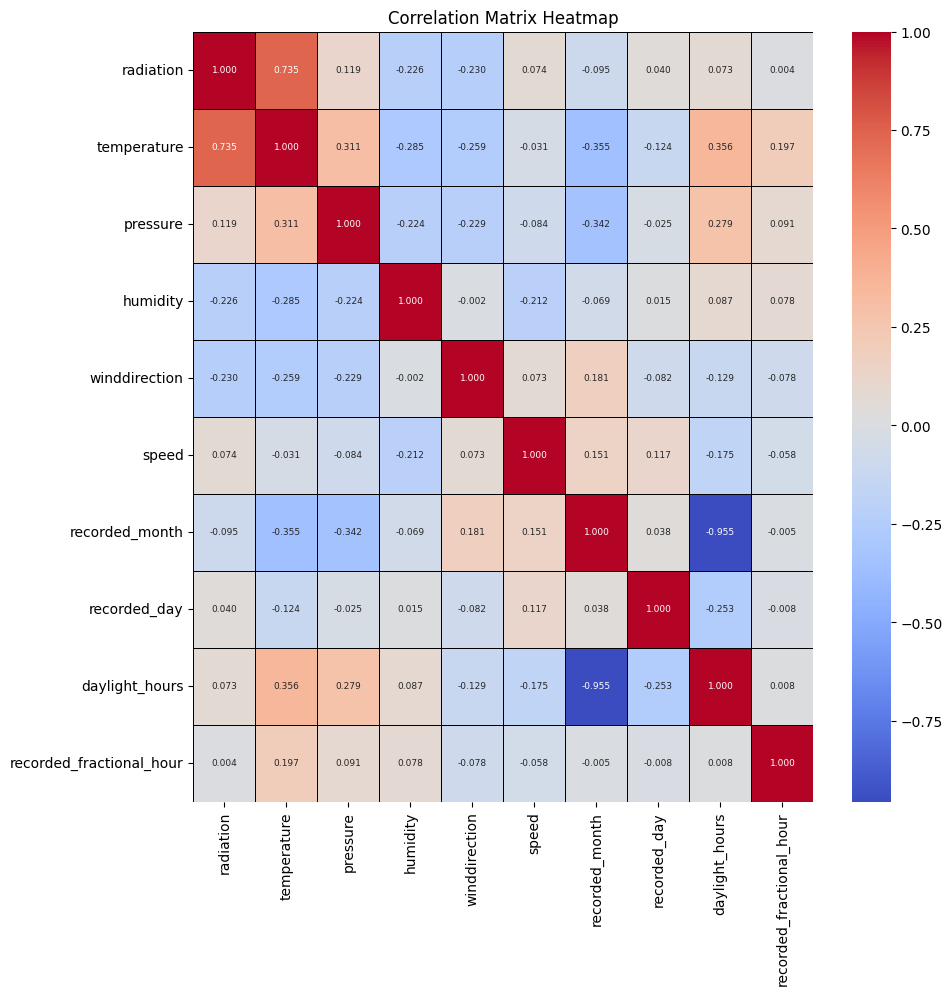

In [15]:
heatmap()

In [13]:
# 1. Create a placeholder column (using 2024 as the leap year base)
df['dummy_year'] = 2016 

# 2. Rename the columns temporarily to match pd.to_datetime expectations
# Create a mapping dictionary for renaming
rename_mapping = {
    'dummy_year': 'year', 
    'recorded_month': 'month', 
    'recorded_day': 'day'
}

# Create a new DataFrame with just the renamed columns for assembly
# Using a temporary DataFrame prevents modifying your original column names
date_components = df[['dummy_year', 'recorded_month', 'recorded_day']].rename(columns=rename_mapping)


# 3. Assemble the Datetime column
# Pandas now finds columns named 'year', 'month', and 'day' in date_components
df['RecordedDateTime'] = pd.to_datetime(date_components)


# 4. Extract the Day of the Year
df['day_of_year'] = df['RecordedDateTime'].dt.dayofyear


# 5. Clean up the intermediate columns
df.drop(columns=['dummy_year', 'RecordedDateTime','recorded_month','recorded_day'], inplace=True) 

print("Successfully created 'day_of_year' column.")
df

Successfully created 'day_of_year' column.


,radiation,temperature,pressure,humidity,winddirection,speed,daylight_hours,recorded_fractional_hour,day_of_year
0,2.58,51,30.43,103,77.27,11.25,12.516667,0.002222,245
1,2.83,51,30.43,103,153.44,9.00,12.516667,0.086111,245
2,2.16,51,30.43,103,142.04,7.87,12.516667,0.335000,245
3,2.21,51,30.43,103,144.12,18.00,12.516667,0.418056,245
4,2.25,51,30.43,103,67.42,11.25,12.516667,0.502500,245
...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,10.950000,23.583889,366
32682,1.21,41,30.34,82,236.79,5.62,10.950000,23.666944,366
32683,1.21,42,30.34,81,218.28,7.87,10.950000,23.751111,366
32684,1.19,41,30.34,80,215.23,7.87,10.950000,23.834167,366


In [14]:
# Define the maximum period of the cycle (24 hours in a day)
MAX_PERIOD = 24

# 1. Calculate the Sine (Y-coordinate) component
df['hour_sin'] = np.sin(2 * np.pi * df['recorded_fractional_hour'] / MAX_PERIOD)

# 2. Calculate the Cosine (X-coordinate) component
df['hour_cos'] = np.cos(2 * np.pi * df['recorded_fractional_hour'] / MAX_PERIOD)

print("Successfully created 'hour_sin' and 'hour_cos' features.")
df

Successfully created 'hour_sin' and 'hour_cos' features.


,radiation,temperature,pressure,humidity,winddirection,speed,daylight_hours,recorded_fractional_hour,day_of_year,hour_sin,hour_cos
0,2.58,51,30.43,103,77.27,11.25,12.516667,0.002222,245,0.000582,1.000000
1,2.83,51,30.43,103,153.44,9.00,12.516667,0.086111,245,0.022542,0.999746
2,2.16,51,30.43,103,142.04,7.87,12.516667,0.335000,245,0.087590,0.996157
3,2.21,51,30.43,103,144.12,18.00,12.516667,0.418056,245,0.109228,0.994017
4,2.25,51,30.43,103,67.42,11.25,12.516667,0.502500,245,0.131175,0.991359
...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,10.950000,23.583889,366,-0.108722,0.994072
32682,1.21,41,30.34,82,236.79,5.62,10.950000,23.666944,366,-0.087083,0.996201
32683,1.21,42,30.34,81,218.28,7.87,10.950000,23.751111,366,-0.065113,0.997878
32684,1.19,41,30.34,80,215.23,7.87,10.950000,23.834167,366,-0.043401,0.999058


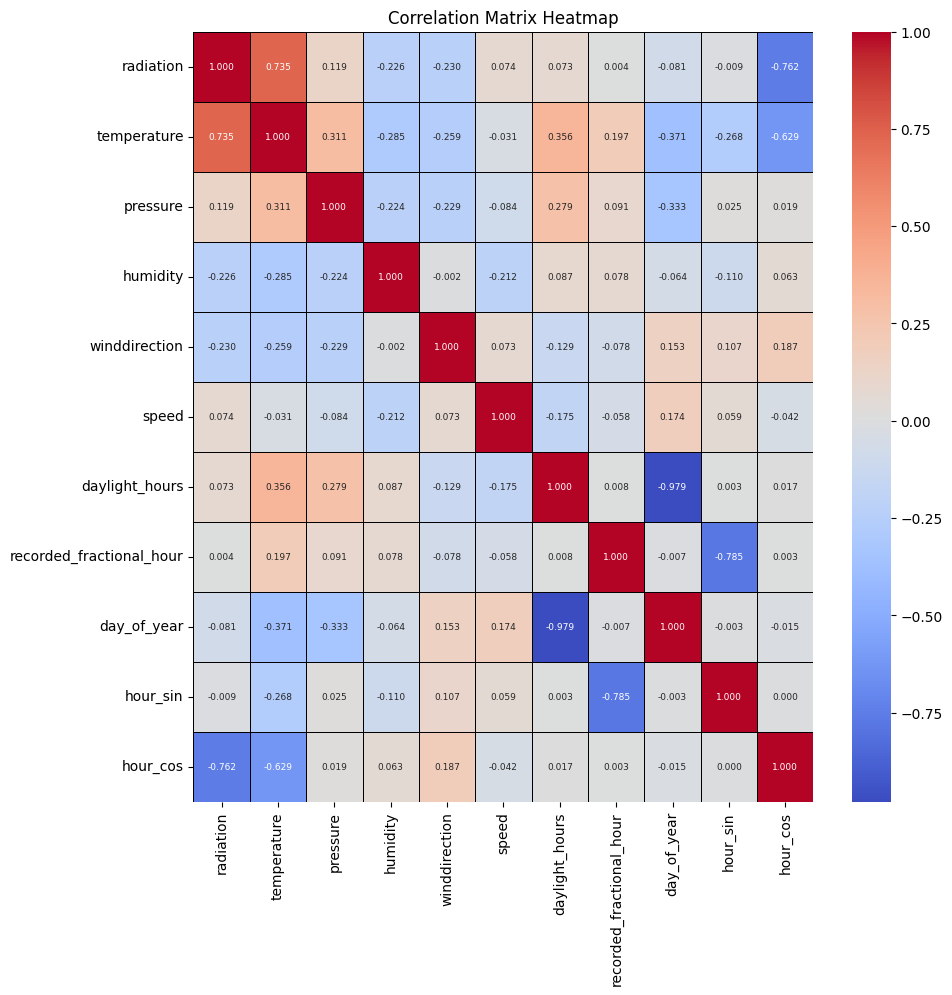

radiation                     2.580000
temperature                  51.000000
pressure                     30.430000
humidity                    103.000000
winddirection                77.270000
speed                        11.250000
daylight_hours               12.516667
recorded_fractional_hour      0.002222
day_of_year                 245.000000
hour_sin                      0.000582
hour_cos                      1.000000
Name: 0, dtype: float64

In [27]:
heatmap()
df.iloc[0]

In [15]:
sin_corr = df['radiation'].corr(df['hour_sin'])
cos_corr = df['radiation'].corr(df['hour_cos'])

print(f"Correlation between Radiation and hour_sin: {sin_corr:.7f}")
print(f"Correlation between Radiation and hour_cos: {cos_corr:.7f}")

Correlation between Radiation and hour_sin: -0.0094957
Correlation between Radiation and hour_cos: -0.7621125


In [29]:
df.describe()

,radiation,temperature,pressure,humidity,winddirection,speed,daylight_hours,recorded_fractional_hour,day_of_year,hour_sin,hour_cos
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,11.509176,12.021548,306.110965,-0.000993,0.000706
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.498854,6.916875,34.781367,0.709667,0.704558
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,10.933333,0.000278,245.000000,-1.000000,-1.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,11.033333,6.004722,277.000000,-0.708083,-0.706181
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.400000,12.008333,306.000000,-0.002182,0.001345
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.916667,18.013611,334.000000,0.708032,0.706078
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.516667,23.940278,366.000000,1.000000,1.000000


In [16]:
# Define the maximum period of the cycle (360 degrees)
MAX_PERIOD = 360

# 1. Calculate the Sine (North/South component)
df['wind_dir_sin'] = np.sin(2 * np.pi * df['winddirection'] / MAX_PERIOD)

# 2. Calculate the Cosine (East/West component)
df['wind_dir_cos'] = np.cos(2 * np.pi * df['winddirection'] / MAX_PERIOD)
df

,radiation,temperature,pressure,humidity,winddirection,speed,daylight_hours,recorded_fractional_hour,day_of_year,hour_sin,hour_cos,wind_dir_sin,wind_dir_cos
0,2.58,51,30.43,103,77.27,11.25,12.516667,0.002222,245,0.000582,1.000000,0.975419,0.220357
1,2.83,51,30.43,103,153.44,9.00,12.516667,0.086111,245,0.022542,0.999746,0.447135,-0.894467
2,2.16,51,30.43,103,142.04,7.87,12.516667,0.335000,245,0.087590,0.996157,0.615111,-0.788440
3,2.21,51,30.43,103,144.12,18.00,12.516667,0.418056,245,0.109228,0.994017,0.586090,-0.810246
4,2.25,51,30.43,103,67.42,11.25,12.516667,0.502500,245,0.131175,0.991359,0.923344,0.383973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,10.950000,23.583889,366,-0.108722,0.994072,-0.856627,-0.515935
32682,1.21,41,30.34,82,236.79,5.62,10.950000,23.666944,366,-0.087083,0.996201,-0.836669,-0.547709
32683,1.21,42,30.34,81,218.28,7.87,10.950000,23.751111,366,-0.065113,0.997878,-0.619505,-0.784993
32684,1.19,41,30.34,80,215.23,7.87,10.950000,23.834167,366,-0.043401,0.999058,-0.576860,-0.816843


In [17]:
sin_corr = df['radiation'].corr(df['wind_dir_sin'])
cos_corr = df['radiation'].corr(df['wind_dir_cos'])

print(f"Correlation between Radiation and wind_dir_sin: {sin_corr:.7f}")
print(f"Correlation between Radiation and wind_dir_cos: {cos_corr:.7f}")

Correlation between Radiation and wind_dir_sin: 0.1066036
Correlation between Radiation and wind_dir_cos: 0.5690251


In [18]:
df.drop(columns=['recorded_fractional_hour','winddirection'], inplace=True)
df

,radiation,temperature,pressure,humidity,speed,daylight_hours,day_of_year,hour_sin,hour_cos,wind_dir_sin,wind_dir_cos
0,2.58,51,30.43,103,11.25,12.516667,245,0.000582,1.000000,0.975419,0.220357
1,2.83,51,30.43,103,9.00,12.516667,245,0.022542,0.999746,0.447135,-0.894467
2,2.16,51,30.43,103,7.87,12.516667,245,0.087590,0.996157,0.615111,-0.788440
3,2.21,51,30.43,103,18.00,12.516667,245,0.109228,0.994017,0.586090,-0.810246
4,2.25,51,30.43,103,11.25,12.516667,245,0.131175,0.991359,0.923344,0.383973
...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,6.75,10.950000,366,-0.108722,0.994072,-0.856627,-0.515935
32682,1.21,41,30.34,82,5.62,10.950000,366,-0.087083,0.996201,-0.836669,-0.547709
32683,1.21,42,30.34,81,7.87,10.950000,366,-0.065113,0.997878,-0.619505,-0.784993
32684,1.19,41,30.34,80,7.87,10.950000,366,-0.043401,0.999058,-0.576860,-0.816843


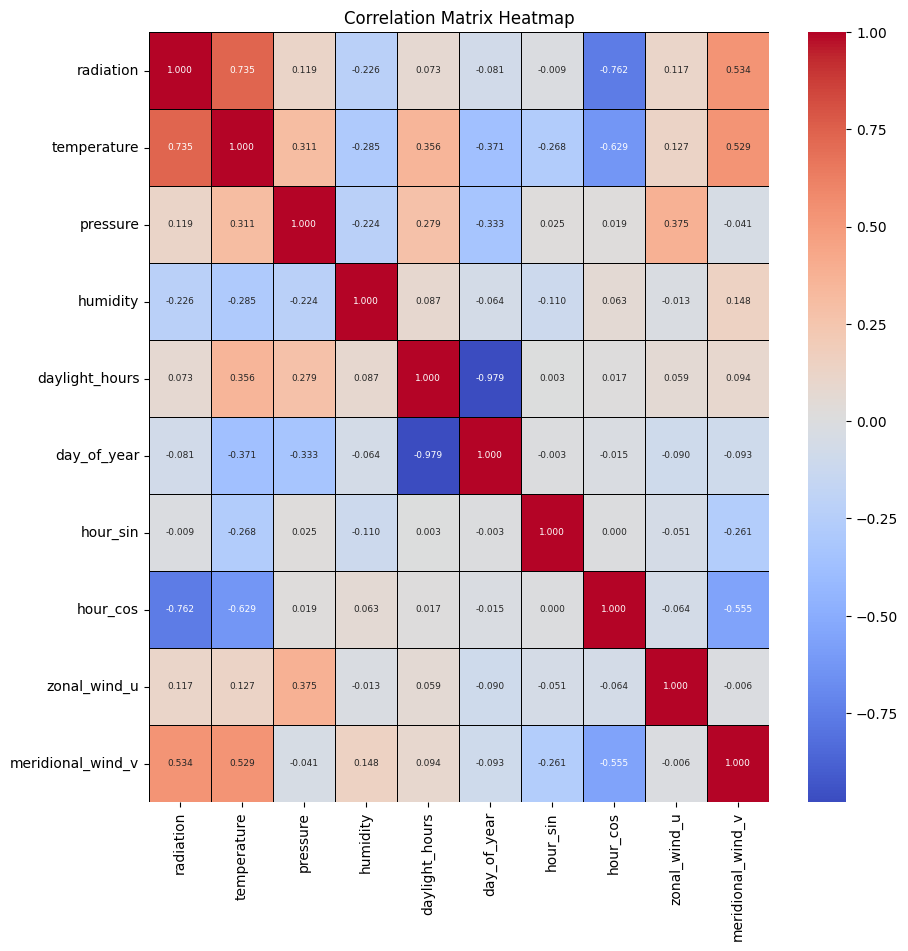

In [40]:
heatmap()

In [19]:
# 1. Calculate the full correlation matrix
correlation_matrix = df.corr()

# 2. Select the row corresponding to the 'radiation' column
# This gives the correlation of 'radiation' with every other feature
radiation_correlations = correlation_matrix['radiation']

# 3. Print the results (excluding radiation correlating with itself, which is 1.0)
print("--- Correlation with Radiation ---")
print(radiation_correlations.drop('radiation'))

--- Correlation with Radiation ---
temperature       0.734955
pressure          0.119016
humidity         -0.226171
speed             0.073627
daylight_hours    0.073456
day_of_year      -0.081320
hour_sin         -0.009496
hour_cos         -0.762113
wind_dir_sin      0.106604
wind_dir_cos      0.569025
Name: radiation, dtype: float64


In [20]:
# Assuming 'speed' is the raw wind speed column
# Note: The sin/cos components already include the necessary 2*pi/360 scaling from earlier steps

# U-Component (Zonal/East-West): Positive is usually West-to-East
df['zonal_wind_u'] = df['speed'] * df['wind_dir_sin']

# V-Component (Meridional/North-South): Positive is usually South-to-North
df['meridional_wind_v'] = df['speed'] * df['wind_dir_cos']

# Calculate correlation for the new vector components
u_corr = df['radiation'].corr(df['zonal_wind_u'])
v_corr = df['radiation'].corr(df['meridional_wind_v'])

print(f"Correlation between Radiation and Zonal Wind (U): {u_corr:.7f}")
print(f"Correlation between Radiation and Meridional Wind (V): {v_corr:.7f}")

df

Correlation between Radiation and Zonal Wind (U): 0.1171286
Correlation between Radiation and Meridional Wind (V): 0.5341914


,radiation,temperature,pressure,humidity,speed,daylight_hours,day_of_year,hour_sin,hour_cos,wind_dir_sin,wind_dir_cos,zonal_wind_u,meridional_wind_v
0,2.58,51,30.43,103,11.25,12.516667,245,0.000582,1.000000,0.975419,0.220357,10.973467,2.479016
1,2.83,51,30.43,103,9.00,12.516667,245,0.022542,0.999746,0.447135,-0.894467,4.024213,-8.050200
2,2.16,51,30.43,103,7.87,12.516667,245,0.087590,0.996157,0.615111,-0.788440,4.840925,-6.205026
3,2.21,51,30.43,103,18.00,12.516667,245,0.109228,0.994017,0.586090,-0.810246,10.549612,-14.584433
4,2.25,51,30.43,103,11.25,12.516667,245,0.131175,0.991359,0.923344,0.383973,10.387623,4.319697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,6.75,10.950000,366,-0.108722,0.994072,-0.856627,-0.515935,-5.782236,-3.482564
32682,1.21,41,30.34,82,5.62,10.950000,366,-0.087083,0.996201,-0.836669,-0.547709,-4.702078,-3.078126
32683,1.21,42,30.34,81,7.87,10.950000,366,-0.065113,0.997878,-0.619505,-0.784993,-4.875505,-6.177892
32684,1.19,41,30.34,80,7.87,10.950000,366,-0.043401,0.999058,-0.576860,-0.816843,-4.539889,-6.428554


In [22]:
cols_to_drop = ['wind_dir_sin','wind_dir_cos','speed']
df.drop(columns = cols_to_drop, inplace=True)
df

KeyError: "['wind_dir_sin', 'wind_dir_cos', 'speed'] not found in axis"

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- 1. Isolate the features ---
seasonal_features = ['daylight_hours', 'day_of_year']
seasonal_data = df[seasonal_features]

# --- 2. Scale the data (CRUCIAL STEP) ---
# PCA requires data to be standardized
scaler = StandardScaler()
seasonal_scaled = scaler.fit_transform(seasonal_data)

# --- 3. Apply PCA (Reduce 2 features to 1) ---
pca = PCA(n_components=1)
seasonal_pc1_array = pca.fit_transform(seasonal_scaled)

# --- 4. Create the new feature column ---
df['seasonal_pc1'] = seasonal_pc1_array

# --- 5. Report and Cleanup ---
variance_explained = pca.explained_variance_ratio_[0]

print(f"PCA on {seasonal_features} reduced to 1 component.")
print(f"Variance Explained by Seasonal_PC1: {variance_explained:.9f}")

df.drop(columns=seasonal_features,inplace=True)

df

PCA on ['daylight_hours', 'day_of_year'] reduced to 1 component.
Variance Explained by Seasonal_PC1: 0.989320360


,radiation,temperature,pressure,humidity,daylight_hours,day_of_year,hour_sin,hour_cos,zonal_wind_u,meridional_wind_v,Seasonal_PC1
0,2.58,51,30.43,103,12.516667,245,0.000582,1.000000,10.973467,2.479016,2.670511
1,2.83,51,30.43,103,12.516667,245,0.022542,0.999746,4.024213,-8.050200,2.670511
2,2.16,51,30.43,103,12.516667,245,0.087590,0.996157,4.840925,-6.205026,2.670511
3,2.21,51,30.43,103,12.516667,245,0.109228,0.994017,10.549612,-14.584433,2.670511
4,2.25,51,30.43,103,12.516667,245,0.131175,0.991359,10.387623,4.319697,2.670511
...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,10.950000,366,-0.108722,0.994072,-5.782236,-3.482564,-2.010188
32682,1.21,41,30.34,82,10.950000,366,-0.087083,0.996201,-4.702078,-3.078126,-2.010188
32683,1.21,42,30.34,81,10.950000,366,-0.065113,0.997878,-4.875505,-6.177892,-2.010188
32684,1.19,41,30.34,80,10.950000,366,-0.043401,0.999058,-4.539889,-6.428554,-2.010188


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radiation          32686 non-null  float64
 1   temperature        32686 non-null  int64  
 2   pressure           32686 non-null  float64
 3   humidity           32686 non-null  int64  
 4   daylight_hours     32686 non-null  float64
 5   day_of_year        32686 non-null  int32  
 6   hour_sin           32686 non-null  float64
 7   hour_cos           32686 non-null  float64
 8   zonal_wind_u       32686 non-null  float64
 9   meridional_wind_v  32686 non-null  float64
 10  Seasonal_PC1       32686 non-null  float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 2.6 MB


# Final Showdown

In [29]:
df

,radiation,temperature,pressure,humidity,daylight_hours,day_of_year,hour_sin,hour_cos,zonal_wind_u,meridional_wind_v,seasonal_pc1
0,2.58,51,30.43,103,12.516667,245,0.000582,1.000000,10.973467,2.479016,2.670511
1,2.83,51,30.43,103,12.516667,245,0.022542,0.999746,4.024213,-8.050200,2.670511
2,2.16,51,30.43,103,12.516667,245,0.087590,0.996157,4.840925,-6.205026,2.670511
3,2.21,51,30.43,103,12.516667,245,0.109228,0.994017,10.549612,-14.584433,2.670511
4,2.25,51,30.43,103,12.516667,245,0.131175,0.991359,10.387623,4.319697,2.670511
...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,10.950000,366,-0.108722,0.994072,-5.782236,-3.482564,-2.010188
32682,1.21,41,30.34,82,10.950000,366,-0.087083,0.996201,-4.702078,-3.078126,-2.010188
32683,1.21,42,30.34,81,10.950000,366,-0.065113,0.997878,-4.875505,-6.177892,-2.010188
32684,1.19,41,30.34,80,10.950000,366,-0.043401,0.999058,-4.539889,-6.428554,-2.010188


In [30]:
from sklearn.model_selection import train_test_split

# Assuming df is your final DataFrame and features are scaled, and 'radiation' is the target.

# Separate Features (X) and Target (Y)
Y = df['radiation']
X = df.drop(columns=['radiation'])

# --- Step 1: Split into Training (60%) and Temp (40%) ---
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.4, random_state=42
)

# --- Step 2: Split Temp into Validation (20%) and Test (20%) ---
# (0.5 of 0.4 = 0.2, or 20% of the original data)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42
)

print(f"Train set size: {len(X_train)} samples")
print(f"Validation set size: {len(X_val)} samples")
print(f"Test set size: {len(X_test)} samples")

Train set size: 19611 samples
Validation set size: 6537 samples
Test set size: 6538 samples


In [31]:
from sklearn.linear_model import LinearRegression

# 1. Initialize the Linear Regression model
linear_model = LinearRegression()

# 2. Train the model
linear_model.fit(X_train, Y_train)

# 3. Predict on the Test Set (or Validation Set if tuning)
Y_pred_test = linear_model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred_test)
r2 = r2_score(Y_test, Y_pred_test)

print("\n### Model Evaluation on Test Set ###")
print(f"RMSE: {rmse:.9f}")
print(f"MAE: {mae:.9f}")
print(f"R-squared (R²): {r2:.9f}")


### Model Evaluation on Test Set ###
RMSE: 164.533606392
MAE: 125.920911185
R-squared (R²): 0.731172837


In [33]:
from sklearn.ensemble import RandomForestRegressor
# 1. Initialize the Random Forest Regressor
# n_estimators=100 is a good starting point; n_jobs=-1 uses all available cores.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
# Assuming X_train and Y_train are ready from the splitting step.
rf_model.fit(X_train, Y_train)

# 3. Predict on the Test Set
Y_pred_rf = rf_model.predict(X_test)

In [34]:
# Calculate evaluation metrics
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print("### Random Forest Model Performance (on Test Set) ###")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.9f}")
print(f"R-squared (R² Score): {r2_rf:.9f}")

### Random Forest Model Performance (on Test Set) ###
Root Mean Squared Error (RMSE): 80.656715807
R-squared (R² Score): 0.935398146


In [35]:
# Create a DataFrame to display feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance
importance = importance.sort_values(by='Importance', ascending=False)

print("\n### Random Forest Feature Importance ###")
print(importance.to_string(index=False))


### Random Forest Feature Importance ###
          Feature  Importance
         hour_cos    0.752423
         humidity    0.108783
      temperature    0.029101
      day_of_year    0.021134
     seasonal_pc1    0.018537
         hour_sin    0.015942
     zonal_wind_u    0.015773
         pressure    0.013106
meridional_wind_v    0.012869
   daylight_hours    0.012333


In [38]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Initialize the XGBoost Regressor
# A basic setup is a good starting point for comparison
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=42, 
    n_jobs=-1
)

# 2. Train the model
xgb_model.fit(X_train, Y_train)

# 3. Predict on the Test Set
Y_pred_xgb = xgb_model.predict(X_test)

In [39]:
# Calculate evaluation metrics
mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(Y_test, Y_pred_xgb)

print("### XGBoost Model Performance (on Test Set) ###")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.9f}")
print(f"R-squared (R² Score): {r2_xgb:.9f}")

### XGBoost Model Performance (on Test Set) ###
Root Mean Squared Error (RMSE): 79.169186367
R-squared (R² Score): 0.937759041


# Other types of regressions (not covered in lectures so far)

## 1. LGBM

In [41]:
import lightgbm as lgb

# 1. Initialize the LightGBM Regressor
# The 'metric' is what LGBM uses internally for optimization
lgbm_model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

# 2. Train and Predict
lgbm_model.fit(X_train, Y_train)
Y_pred_lgbm = lgbm_model.predict(X_test)

# 3. Evaluate
rmse_lgbm = np.sqrt(mean_squared_error(Y_test, Y_pred_lgbm))
r2_lgbm = r2_score(Y_test, Y_pred_lgbm)

print("### LightGBM Model Performance ###")
print(f"RMSE: {rmse_lgbm:.9f}")
print(f"R-squared (R² Score): {r2_lgbm:.9f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1505
[LightGBM] [Info] Number of data points in the train set: 19611, number of used features: 10
[LightGBM] [Info] Start training from score 206.188860
### LightGBM Model Performance ###
RMSE: 79.227002431
R-squared (R² Score): 0.937668100


## 2. Ridge Regression (L2 Regularization)

In [42]:
from sklearn.linear_model import Ridge

# 1. Initialize the Ridge Regressor
# Alpha (α) is the regularization strength; 1.0 is a common default.
ridge_model = Ridge(alpha=1.0, random_state=42)

# 2. Train and Predict
ridge_model.fit(X_train, Y_train)
Y_pred_ridge = ridge_model.predict(X_test)

# 3. Evaluate
rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_pred_ridge))
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print("### Ridge Regression Model Performance ###")
print(f"RMSE: {rmse_ridge:.9f}")
print(f"R-squared (R² Score): {r2_ridge:.9f}")

### Ridge Regression Model Performance ###
RMSE: 164.538183684
R-squared (R² Score): 0.731157879


## 3. Support Vector Regressor (SVR) 📐

In [43]:
from sklearn.svm import SVR

# 1. Initialize the SVR Model
# The 'rbf' (Radial Basis Function) kernel is standard for non-linear regression.
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)

# 2. Train and Predict
# (This step may take significant time)
svr_model.fit(X_train, Y_train)
Y_pred_svr = svr_model.predict(X_test)

# 3. Evaluate
rmse_svr = np.sqrt(mean_squared_error(Y_test, Y_pred_svr))
r2_svr = r2_score(Y_test, Y_pred_svr)

print("### SVR Model Performance ###")
print(f"RMSE: {rmse_svr:.9f}")
print(f"R-squared (R² Score): {r2_svr:.9f}")

### SVR Model Performance ###
RMSE: 289.476088998
R-squared (R² Score): 0.167873586
